<a id='TOC'></a>
# Project: *Analysis of Future of Buffalo Breeds and Milk Production growth in India*

`
By   : Shahapurkar, Gangaprasad
Email: garashah@iu.edu`

<img src="images/cover_photo.jpg" alt="Cover photo" style="width:=500px;height:=300px;"/>

## Abstract and objective


In this notebook we will load livestock data of India related to Buffalo and apply machine learning algorithm to the data predict milk production growth 

## Prepare the notebook (imports, helper functions)

The goal of this section is to import required libraries and define the custom functions required for processind data and implementing machine learning algorithm

In [1]:
# Check if python is installed 
try:
    !python --version
except:
    print("Seems python is not installed")

Python 3.7.4


In [28]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
from time import time
import pandas as pd
import sys

<a id=ImportData></a>
## Import data

The goal of this section is to import the data required from various sources

In [3]:
buffalo_df = pd.read_csv("project_data/buffalo_final_data.csv")

In [4]:
buffalo_df.head()

,State_name,Banni_male_total,Banni_female_total,Bhadawari_male_total,Bhadawari_female_total,Chilika_male_total,Chilika_female_total,Jaffarabadi_male_total,Jaffarabadi_female_total,Kalahandi_male_total,...,201516_yield_in_milk,201617_yield_in_milk,201718_yield_in_milk,201819_yield_in_milk,201314_milk_production,201415_milk_production,201516_milk_production,201617_milk_production,201718_milk_production,201819_milk_production
0,ANDAMAN & NICOBAR ISLANDS,0,0,0,0,0,0,0,0,0,...,3.83,3.63,3.64,3.84,1.80,1.72,1.09,1.51,1.55,1.97
1,ANDHRA PRADESH,0,0,0,0,0,0,1748,13313,0,...,5.52,5.65,7.34,7.52,9207.05,6573.96,7444.83,8308.18,9100.76,9932.01
2,ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,...,2.61,2.55,2.54,2.55,NaN,0.10,0.40,0.44,0.53,0.70
3,ASSAM,0,0,0,0,0,0,0,0,0,...,3.33,3.64,3.43,3.43,122.13,119.93,116.90,114.89,115.44,117.13
4,BIHAR,0,0,2969,24121,0,0,3382,24984,0,...,4.27,4.30,4.38,4.39,3014.94,3248.01,3209.69,3358.03,3619.42,3850.61


In [5]:
buffalo_df.columns

Index(['State_name', 'Banni_male_total', 'Banni_female_total',
       'Bhadawari_male_total', 'Bhadawari_female_total', 'Chilika_male_total',
       'Chilika_female_total', 'Jaffarabadi_male_total',
       'Jaffarabadi_female_total', 'Kalahandi_male_total',
       'Kalahandi_female_total', 'Marathwadi_male_total',
       'Marathwadi_female_total', 'Mehsana_male_total', 'Mehsana_female_total',
       'Murrah_male_total', 'Murrah_female_total', 'Nagpuri_male_total',
       'Nagpuri_female_total', 'Nili_Ravi_male_total',
       'Nili_Ravi_female_total', 'Non_descript_male_total',
       'Non_descript_female_total', 'Pandharpuri_male_total',
       'Pandharpuri_female_total', 'Surti_male_total', 'Surti_female_total',
       'Toda_male_total', 'Toda_female_total', 'total_male', 'total_female',
       'total_buffalo', '201314_in_milk', '201415_in_milk', '201516_in_milk',
       '201617_in_milk', '201718_in_milk', '201819_in_milk',
       '201314_yield_in_milk', '201415_yield_in_milk', '20151

<a id=EDA></a>
## EDA
[Return to start](#TOC)

The goal of this section is to get familiar with the data that will be used for the end to end pipeline. It is very important to explore the data and summarize its main characteristics before diving in the machine learning models. It is also interesting to see how the different features are correlated with the target feature

In [6]:
buffalo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State_name                 36 non-null     object 
 1   Banni_male_total           36 non-null     int64  
 2   Banni_female_total         36 non-null     int64  
 3   Bhadawari_male_total       36 non-null     int64  
 4   Bhadawari_female_total     36 non-null     int64  
 5   Chilika_male_total         36 non-null     int64  
 6   Chilika_female_total       36 non-null     int64  
 7   Jaffarabadi_male_total     36 non-null     int64  
 8   Jaffarabadi_female_total   36 non-null     int64  
 9   Kalahandi_male_total       36 non-null     int64  
 10  Kalahandi_female_total     36 non-null     int64  
 11  Marathwadi_male_total      36 non-null     int64  
 12  Marathwadi_female_total    36 non-null     int64  
 13  Mehsana_male_total         36 non-null     int64  
 

In [150]:
buffalo_df.describe()

,Banni_male_total,Banni_female_total,Bhadawari_male_total,Bhadawari_female_total,Chilika_male_total,Chilika_female_total,Jaffarabadi_male_total,Jaffarabadi_female_total,Kalahandi_male_total,Kalahandi_female_total,...,201516_yield_in_milk,201617_yield_in_milk,201718_yield_in_milk,201819_yield_in_milk,201314_milk_production,201415_milk_production,201516_milk_production,201617_milk_production,201718_milk_production,201819_milk_production
count,36.000000,36.000000,36.000000,3.600000e+01,36.000000,36.000000,36.000000,3.600000e+01,36.0,36.000000,...,36.000000,34.000000,34.000000,34.000000,31.000000,35.000000,34.000000,33.000000,33.000000,33.000000
mean,1010.972222,9603.527778,7889.833333,4.082647e+04,26.916667,67.138889,3827.666667,4.538061e+04,1928.5,2016.361111,...,3.979722,4.195588,4.292647,4.440588,2272.295484,2134.527429,2248.744118,2462.546667,2613.923030,2791.360606
std,6065.833333,57621.166667,43553.422352,2.200156e+05,161.500000,402.833333,14390.313861,2.216522e+05,11571.0,12098.166667,...,1.976630,1.945710,2.131691,2.241055,3837.466181,3751.339931,3841.611369,4145.149001,4399.503224,4683.839298
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,3.242500,3.410000,3.325000,3.347500,19.220000,2.890000,7.297500,6.290000,5.800000,5.620000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,4.190000,4.305000,4.425000,4.460000,286.610000,233.450000,281.430000,337.600000,355.160000,372.030000
75%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,132.750000,3.210000e+02,0.0,0.000000,...,5.082500,5.170000,5.070000,5.165000,3418.680000,3135.245000,3186.797500,3358.030000,3619.420000,3850.610000
max,36395.000000,345727.000000,261685.000000,1.322035e+06,969.000000,2417.000000,82521.000000,1.329863e+06,69426.0,72589.000000,...,8.210000,8.390000,8.770000,9.260000,16804.500000,17523.930000,16864.510000,17691.890000,18517.160000,19462.980000


Check columns having null values

In [7]:
null_info = buffalo_df.isna().sum()

for key in null_info.keys():
    if(null_info[key] > 0):
        print(key,":",null_info[key])

201314_in_milk : 4
201617_in_milk : 2
201718_in_milk : 2
201819_in_milk : 2
201314_yield_in_milk : 4
201617_yield_in_milk : 2
201718_yield_in_milk : 2
201819_yield_in_milk : 2
201314_milk_production : 5
201415_milk_production : 1
201516_milk_production : 2
201617_milk_production : 3
201718_milk_production : 3
201819_milk_production : 3


Fill missing values

In [8]:
buffalo_df.fillna(value=0, inplace=True)

Reset index to state name

In [9]:
buffalo_df.set_index(["State_name"], drop=True, inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

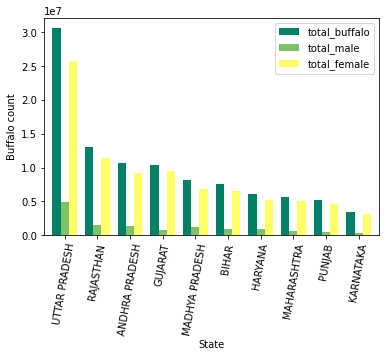

In [97]:
top_df = buffalo_df[["total_buffalo","total_male","total_female"]]
top_df.sort_values(by="total_buffalo", axis=0, ascending=False, inplace=True)
top_df = top_df.iloc[:10]
plt.figure(figsize=(10,5))
top_df.plot.bar(colormap=plt.get_cmap('summer'), width=0.75)
plt.ylabel('Buffalo count')
plt.xlabel('State')
plt.xticks(rotation=80)

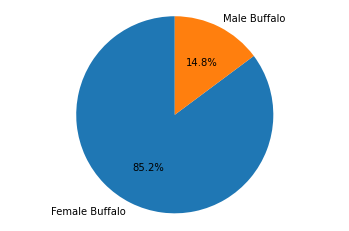

In [85]:
labels = ['Female Buffalo', 'Male Buffalo']
sizes = [np.sum(buffalo_df.total_female), np.sum(buffalo_df.total_male)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

,Banni_male_total,Banni_female_total,Bhadawari_male_total,Bhadawari_female_total,Chilika_male_total,Chilika_female_total,Jaffarabadi_male_total,Jaffarabadi_female_total,Kalahandi_male_total,Kalahandi_female_total,...,Murrah,Nagpuri,Nili Ravi,Non Descript,Pandharpuri,Surti,Toda,avg_in_milk,avg_yield_in_milk,avg_milk_production
State_name,,,,,,,,,,,,,,,,,,,,,
UTTAR PRADESH,0,0,261685,1322035,0,0,27328,103439,0,0,...,20110852,0,12519,8772357,0,2508,0,10952.42,4.45,17810.83


<a id=FeatureEng></a>
## Feature Engineering 
[Return to start](#TOC)

When conducting an end to end Machine Learning project, after exploring and preprocessing the data it is essential to think of feature engineering. It consists of creating new feature(s) based on the features that already exist in the dataset that can be useful for training the model.

**Step 1:** Calculate total number of buffalos under each category

In [19]:
buffalo_df["Banni"] = buffalo_df["Banni_male_total"] + buffalo_df["Banni_female_total"]
buffalo_df["Bhadawari"] = buffalo_df["Bhadawari_male_total"] + buffalo_df["Bhadawari_female_total"]
buffalo_df["Chilika"] = buffalo_df["Chilika_male_total"] + buffalo_df["Chilika_female_total"]
buffalo_df["Jaffarabadi"] = buffalo_df["Jaffarabadi_male_total"] + buffalo_df["Jaffarabadi_female_total"]
buffalo_df["Kalahandi"] = buffalo_df["Kalahandi_male_total"] + buffalo_df["Kalahandi_female_total"]
buffalo_df["Marathwadi"] = buffalo_df["Marathwadi_male_total"] + buffalo_df["Marathwadi_female_total"]
buffalo_df["Mehsana"] = buffalo_df["Mehsana_male_total"] + buffalo_df["Mehsana_female_total"]
buffalo_df["Murrah"] = buffalo_df["Murrah_male_total"] + buffalo_df["Murrah_female_total"]
buffalo_df["Nagpuri"] = buffalo_df["Nagpuri_male_total"] + buffalo_df["Nagpuri_female_total"]
buffalo_df["Nili Ravi"] = buffalo_df["Nili_Ravi_male_total"] + buffalo_df["Nili_Ravi_female_total"]
buffalo_df["Non Descript"] = buffalo_df["Non_descript_male_total"] + buffalo_df["Non_descript_female_total"]
buffalo_df["Pandharpuri"] = buffalo_df["Pandharpuri_male_total"] + buffalo_df["Pandharpuri_female_total"]
buffalo_df["Surti"] = buffalo_df["Surti_male_total"] + buffalo_df["Surti_female_total"]
buffalo_df["Toda"] = buffalo_df["Toda_male_total"] + buffalo_df["Toda_female_total"]

In [20]:
count_df = buffalo_df[["total_buffalo","Banni","Bhadawari","Chilika","Jaffarabadi","Kalahandi","Marathwadi","Mehsana",
                       "Murrah","Nagpuri","Nili Ravi","Non Descript","Pandharpuri","Surti","Toda","total_male",
                      "total_female"]]
count_df.sort_values(by="total_buffalo", axis=0, ascending=False, inplace=True)
count_df.head()

,total_buffalo,Banni,Bhadawari,Chilika,Jaffarabadi,Kalahandi,Marathwadi,Mehsana,Murrah,Nagpuri,Nili Ravi,Non Descript,Pandharpuri,Surti,Toda,total_male,total_female
State_name,,,,,,,,,,,,,,,,,
UTTAR PRADESH,30625334,0,1583720,0,130767,0,0,11444,20110852,0,12519,8772357,0,2508,0,4914705,25710629
RAJASTHAN,12976095,0,2610,0,20230,0,0,0,6448563,0,0,5612634,0,892058,0,1575276,11400819
ANDHRA PRADESH,10622790,0,0,0,15061,0,0,5219,5227270,13521,0,5361719,0,0,0,1350533,9272257
GUJARAT,10385574,382122,0,0,1412384,0,0,3545647,0,0,0,3215549,0,1829872,0,835775,9549799
MADHYA PRADESH,8187989,0,81983,0,38735,0,0,0,1446078,20959,0,6600234,0,0,0,1283620,6904369


**Step 2:** Calculate average of below fields of all past 6 years data points
- **Average in milk** - Average number of In-Milk animals per state (figures in 000 nos)
- **Average yeild in milk** - Average yield per In-Milk animals per state (figures in kg/day)
- **Average milk production** - Average milk production per state (figures in 000 tones)

In [21]:
buffalo_df["avg_in_milk"] = (buffalo_df["201314_in_milk"] + buffalo_df["201415_in_milk"] + buffalo_df["201516_in_milk"] + 
                             buffalo_df["201617_in_milk"] + buffalo_df["201718_in_milk"] + buffalo_df["201819_in_milk"])/6

buffalo_df["avg_yield_in_milk"] = (buffalo_df["201314_yield_in_milk"] + buffalo_df["201415_yield_in_milk"] + buffalo_df["201516_yield_in_milk"] + 
                                   buffalo_df["201617_yield_in_milk"] + buffalo_df["201718_yield_in_milk"] + buffalo_df["201819_yield_in_milk"])/6

buffalo_df["avg_milk_production"] = (buffalo_df["201314_milk_production"] + buffalo_df["201415_milk_production"] + buffalo_df["201516_milk_production"] + 
                                     buffalo_df["201617_milk_production"] + buffalo_df["201718_milk_production"] + buffalo_df["201819_milk_production"])/6

**Step 3:** Round off the decimal values to 2 decimal places

In [22]:
buffalo_df = buffalo_df.round(2)

**Step 4:** Check data corelation 

In [23]:
corr_count_df = buffalo_df.corr()

Top 5 attributes with negative co-relation

In [24]:
corr_count_df["total_buffalo"].sort_values(ascending=False).tail(5)

Kalahandi_male_total   -0.066122
Chilika_male_total     -0.066122
Chilika_female_total   -0.066122
Chilika                -0.066122
Kalahandi              -0.066122
Name: total_buffalo, dtype: float64

Top 5 attributes with positive co-relation 

In [25]:
corr_count_df["total_buffalo"].sort_values(ascending=False).head(5)

total_buffalo     1.000000
total_female      0.999127
avg_in_milk       0.986869
201314_in_milk    0.984075
201617_in_milk    0.983183
Name: total_buffalo, dtype: float64

Text(0.5, 1.0, 'Buffalo count')

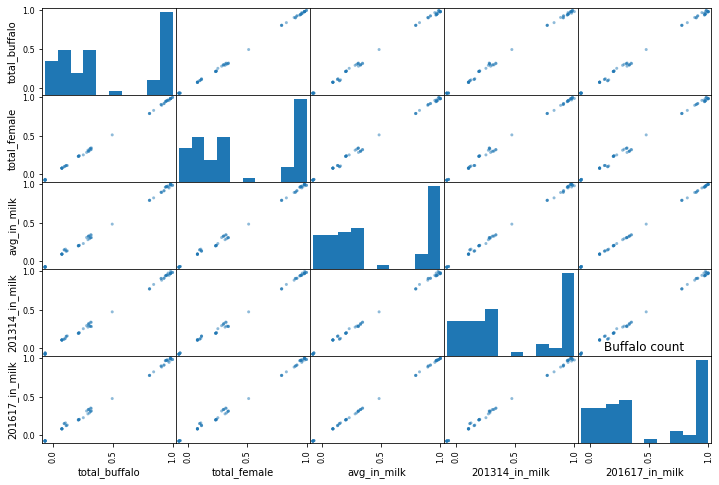

In [30]:
attributes = list(corr_count_df["total_buffalo"].sort_values(ascending=False).head(5).keys())
scatter_matrix(corr_count_df[attributes], figsize=(12, 8));

In [32]:
buffalo_df[["avg_in_milk","avg_yield_in_milk","avg_milk_production"]].head()

,avg_in_milk,avg_yield_in_milk,avg_milk_production
State_name,,,
ANDAMAN & NICOBAR ISLANDS,1.17,3.78,1.61
ANDHRA PRADESH,3838.80,6.14,8427.80
ARUNACHAL PRADESH,0.44,1.82,0.36
ASSAM,98.39,3.30,117.74
BIHAR,2175.46,4.26,3383.45


**Step 5:** Buffalo breed analysis of state *Uttar pradesh* and *Punjab*

Uttar pradesh state is the top most state in milk production and total number of buffalo breeds in India. Below are major three types of buffalo breed.This state has highest number of Murrah buffalo breed which are known worldwide for high yeild, Non Descript and Bhadawari.

In [131]:
top_state_df = buffalo_df.loc[buffalo_df.total_buffalo == np.max(buffalo_df.total_buffalo)]
labels1 = ["Bhadawari","Murrah","Non Descript"]
sizes1 = [1583720,20110852,8772357]
top_state_df[["Banni","Bhadawari","Chilika","Jaffarabadi","Kalahandi","Marathwadi","Mehsana",
              "Murrah","Nagpuri","Nili Ravi","Non Descript","Pandharpuri","Surti","Toda"]]


,Banni,Bhadawari,Chilika,Jaffarabadi,Kalahandi,Marathwadi,Mehsana,Murrah,Nagpuri,Nili Ravi,Non Descript,Pandharpuri,Surti,Toda
State_name,,,,,,,,,,,,,,
UTTAR PRADESH,0,1583720,0,130767,0,0,11444,20110852,0,12519,8772357,0,2508,0


Punjab stands in list of top 10 states with total number of buffalos. Below data shows that Punjab stands number one state in the list of average yield per in-milk animal becuase of its top share of Murrah buffalo breed which is known for milk production

In [132]:
top_state_df = buffalo_df.loc[buffalo_df.index == "PUNJAB"]
labels2 = ["Murrah","Nili Ravi","Non Descript"]
sizes2 = [4116508,485940,523218]
top_state_df[["Banni","Bhadawari","Chilika","Jaffarabadi","Kalahandi","Marathwadi","Mehsana",
              "Murrah","Nagpuri","Nili Ravi","Non Descript","Pandharpuri","Surti","Toda"]]

,Banni,Bhadawari,Chilika,Jaffarabadi,Kalahandi,Marathwadi,Mehsana,Murrah,Nagpuri,Nili Ravi,Non Descript,Pandharpuri,Surti,Toda
State_name,,,,,,,,,,,,,,
PUNJAB,0,2254,0,0,0,0,22891,4116508,0,485940,523218,0,0,0


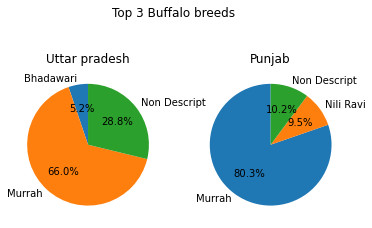

In [136]:
fig, (ax0,ax1) = plt.subplots(1, 2)
fig.suptitle('Top 3 Buffalo breeds')
ax0.set_title('Uttar pradesh')
ax1.set_title('Punjab')
ax0.pie(sizes1, labels=labels1, autopct='%1.1f%%',startangle=90)
ax1.pie(sizes2, labels=labels2, autopct='%1.1f%%',startangle=90)
plt.show()

In [130]:
Murrah_df = buffalo_df[["Murrah", "total_buffalo","avg_yield_in_milk","avg_milk_production"]]
Murrah_df["Murrah_pct_share"] = np.round(((Murrah_df.Murrah / Murrah_df.total_buffalo) * 100),2)
Murrah_df.sort_values(by="Murrah", axis=0, ascending=False, inplace=True)
Murrah_df.head(10)

,Murrah,total_buffalo,avg_yield_in_milk,avg_milk_production,Murrah_pct_share
State_name,,,,,
UTTAR PRADESH,20110852,30625334,4.45,17810.83,65.67
RAJASTHAN,6448563,12976095,6.21,10379.76,49.70
ANDHRA PRADESH,5227270,10622790,6.14,8427.80,49.21
HARYANA,5011145,6085312,8.30,7266.46,82.35
PUNJAB,4116508,5159734,8.39,7927.94,79.78
BIHAR,2419952,7567233,4.26,3383.45,31.98
MADHYA PRADESH,1446078,8187989,4.32,6035.86,17.66
MAHARASHTRA,986981,5594392,4.82,4028.20,17.64
TAMIL NADU,435634,780431,4.07,428.14,55.82


<a id=Modeling></a>
## Modeling
[Return to start](#TOC)

Now that we have explored the data, cleaned it, preprocessed it and added a new feature to it, we can start the modeling part of the project by applying algorithms.

### Benchmarking 

### Model 1


In [38]:
model_df1 = buffalo_df[["total_buffalo", "total_male", "total_female",
                       "avg_in_milk","avg_yield_in_milk","avg_milk_production"]]
model_df1.sort_values(by="avg_yield_in_milk", axis=0, ascending=False, inplace=True)
model_df1[["avg_yield_in_milk"]].head(10)

,avg_yield_in_milk
State_name,
PUNJAB,8.39
HARYANA,8.30
CHANDIGARH,7.38
RAJASTHAN,6.21
ANDHRA PRADESH,6.14
PUDUCHERRY,5.51
WEST BENGAL,5.29
JAMMU & KASHMIR,5.18
GUJARAT,4.98


### Model 2
**Top 10 states records with highest Average Milk Production**

In [39]:
model_df2 = buffalo_df[["total_buffalo", "total_male", "total_female",
                       "avg_in_milk","avg_yield_in_milk","avg_milk_production"]]
model_df2.sort_values(by="avg_milk_production", axis=0, ascending=False, inplace=True)
model_df2[["avg_milk_production"]].head(10)

,avg_milk_production
State_name,
UTTAR PRADESH,17810.83
RAJASTHAN,10379.76
ANDHRA PRADESH,8427.80
PUNJAB,7927.94
HARYANA,7266.46
GUJARAT,6665.03
MADHYA PRADESH,6035.86
MAHARASHTRA,4028.20
BIHAR,3383.45


In [40]:
mean_avg_yield_in_milk_sample = np.round(buffalo_df.avg_yield_in_milk.mean(), decimals=2)
mean_avg_milk_production_sample = np.round(buffalo_df.avg_milk_production.mean(), decimals=2)

In [41]:
print("Average Yield Per In-Milk Animal from Buffalos for whole sample:", mean_avg_yield_in_milk_sample)
print("Average Milk Production from Buffalos for whole sample         :", mean_avg_milk_production_sample)

Average Yield Per In-Milk Animal from Buffalos for whole sample: 4.02
Average Milk Production from Buffalos for whole sample         : 2227.99


Add the columns to both the models

In [42]:
model_df1["mean_avg_yield_in_milk_sample"] = mean_avg_yield_in_milk_sample
model_df1["mean_avg_milk_production_sample"] = mean_avg_milk_production_sample
model_df2["mean_avg_yield_in_milk_sample"] = mean_avg_yield_in_milk_sample
model_df2["mean_avg_milk_production_sample"] = mean_avg_milk_production_sample

In [43]:
model_df1[["avg_yield_in_milk", "mean_avg_yield_in_milk_sample"]].head(10)

,avg_yield_in_milk,mean_avg_yield_in_milk_sample
State_name,,
PUNJAB,8.39,4.02
HARYANA,8.30,4.02
CHANDIGARH,7.38,4.02
RAJASTHAN,6.21,4.02
ANDHRA PRADESH,6.14,4.02
PUDUCHERRY,5.51,4.02
WEST BENGAL,5.29,4.02
JAMMU & KASHMIR,5.18,4.02
GUJARAT,4.98,4.02


In [44]:
model_df2[["avg_milk_production","mean_avg_milk_production_sample"]].head(10)

,avg_milk_production,mean_avg_milk_production_sample
State_name,,
UTTAR PRADESH,17810.83,2227.99
RAJASTHAN,10379.76,2227.99
ANDHRA PRADESH,8427.80,2227.99
PUNJAB,7927.94,2227.99
HARYANA,7266.46,2227.99
GUJARAT,6665.03,2227.99
MADHYA PRADESH,6035.86,2227.99
MAHARASHTRA,4028.20,2227.99
BIHAR,3383.45,2227.99


In [45]:
model_df1[["avg_yield_in_milk", "mean_avg_yield_in_milk_sample"]].tail(10)

,avg_yield_in_milk,mean_avg_yield_in_milk_sample
State_name,,
ASSAM,3.30,4.02
KARNATAKA,2.99,4.02
NCT OF DELHI,2.88,4.02
TRIPURA,2.56,4.02
MEGHALAYA,1.84,4.02
ARUNACHAL PRADESH,1.82,4.02
SIKKIM,0.78,4.02
DADRA & NAGAR HAVELI,0.78,4.02
MIZORAM,0.00,4.02


In [46]:
model_df2[["avg_milk_production","mean_avg_milk_production_sample"]].tail(10)

,avg_milk_production,mean_avg_milk_production_sample
State_name,,
TRIPURA,1.68,2227.99
ANDAMAN & NICOBAR ISLANDS,1.61,2227.99
MEGHALAYA,1.38,2227.99
DADRA & NAGAR HAVELI,0.47,2227.99
ARUNACHAL PRADESH,0.36,2227.99
DAMAN & DIU,0.23,2227.99
SIKKIM,0.03,2227.99
PUDUCHERRY,0.00,2227.99
MIZORAM,0.00,2227.99


<a id=Evaluate></a>
## Evaluation, reporting, analysis
[Return to start](#TOC)

After conducting an end to end Machine Learning project, it is time to evaluate our model, report our analysis and observations

In [48]:
model_df1_top10 = model_df1.iloc[:10]
model_df2_top10 = model_df2.iloc[:10]

### Model 1

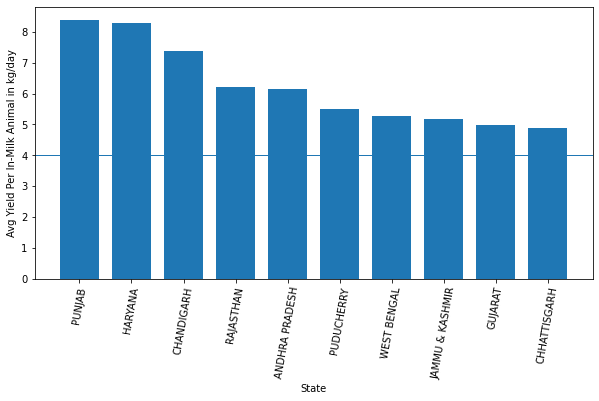

In [76]:
xlabel = list(model_df1_top10.index)
ylabel = np.arange(0,10)
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(xlabel, model_df1_top10["avg_yield_in_milk"], width=0.75)
plt.axhline(y=mean_avg_yield_in_milk_sample,linewidth=1)
plt.xticks(rotation=80)
plt.xlabel('State')
plt.ylabel('Avg Yield Per In-Milk Animal in kg/day')
plt.show()

### Model 2

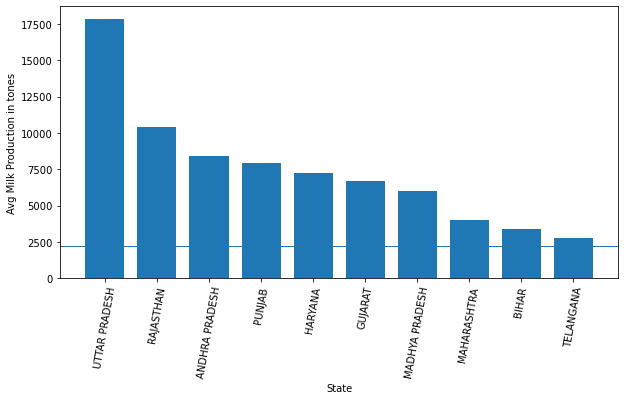

In [73]:
xlabel = list(model_df2_top10.index)
ylabel = [0, 2000, 5000, 7000, 9000, 11000, 13000, 15000, 17000, 19000]
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(xlabel, model_df2_top10["avg_milk_production"], width=0.75)
plt.axhline(y=mean_avg_milk_production_sample,linewidth=1)
plt.xticks(rotation=80)
plt.xlabel('State')
plt.ylabel('Avg Milk Production in tones')
plt.show()